### Analyzing the credit card EMV chip usage in preventing fraudulent transations

In [2]:
%matplotlib widget

# Import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Load in csv and replace column integers
card_df = pd.read_csv("main\Resources\cleaned_card_data.csv")
card_df['Used Chip'].replace(1, 'Chip', inplace=True)
card_df['Used Chip'].replace(0, 'No Chip', inplace=True)
card_df['Fraud'].replace(1, 'Fraud', inplace=True)
card_df['Fraud'].replace(0, 'Not Fraud', inplace=True)
card_df['Used Pin Number'].replace(1, 'Pin', inplace=True)
card_df['Used Pin Number'].replace(0, 'No Pin', inplace=True)
card_df.head()

,Distance From Home,Distance From Last Transaction,Ratio to Median Purchase Price,Repeat Retailer,Used Chip,Used Pin Number,Online Order,Fraud
0,57.88,0.31,1.95,1,Chip,No Pin,0,Not Fraud
1,10.83,0.18,1.29,1,No Chip,No Pin,0,Not Fraud
2,5.09,0.81,0.43,1,No Chip,No Pin,1,Not Fraud
3,2.25,5.60,0.36,1,Chip,No Pin,1,Not Fraud
4,44.19,0.57,2.22,1,Chip,No Pin,1,Not Fraud


In [4]:
# Create Used Chip dataframe
used_chip_df = card_df[["Fraud", "Used Chip"]].set_index("Fraud")
used_chip_df.head()

,Used Chip
Fraud,
Not Fraud,Chip
Not Fraud,No Chip
Not Fraud,No Chip
Not Fraud,Chip
Not Fraud,Chip


In [5]:
fraud_chip_df = used_chip_df.loc[(used_chip_df["Used Chip"] == "Chip"), :]
fraud_chip_df.head()

,Used Chip
Fraud,
Not Fraud,Chip
Not Fraud,Chip
Not Fraud,Chip
Not Fraud,Chip
Not Fraud,Chip


In [6]:
grouped_chip_df = fraud_chip_df.groupby(['Fraud', 'Used Chip']).value_counts()
grouped_chip_df.head()

Fraud      Used Chip
Fraud      Chip          22410
Not Fraud  Chip         327989
Name: count, dtype: int64

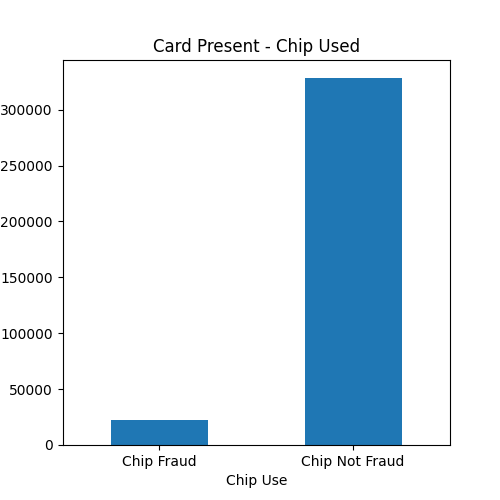

In [7]:
chip_use_plot = grouped_chip_df.plot(kind="bar", figsize=(5,5))
plt.title("Card Present - Chip Used")
plt.ylabel("Transactions")
plt.gca().set_xticklabels(['Chip Fraud', 'Chip Not Fraud'])
plt.xticks(rotation=0)
plt.xlabel("Chip Use", rotation=0)
plt.show()
plt.tight_layout()

In [8]:
# Save an image of the chart and print it to the screen
plt.savefig("../Resources/Chip.png")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../Resources/Chip.png'